<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Feature%20Selection/Univariate_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

## Introduction

* Noisy (non informative) features are added to the iris dataset. 

* Support vector machine (SVM) is used to classify the dataset both before and after applying univariate feature selection. 

* Compare model accuracy and examine the impact of univariate feature selection on model weights.

## Load the data

In [14]:
iris = load_iris()

X = iris.data
y = iris.target
print('Shape of feature set', X.shape)

Shape of feature set (150, 4)


## Add Noise

In [10]:
np.random.seed(42)

noise = np.random.uniform(low=0.0, high=0.1, size=(X.shape[0],20))

In [13]:
X_aug = np.hstack([X, noise])
print('Shape of new feature set', X_aug.shape)

Shape of new feature set (150, 24)


In [53]:
# train - test split
X_train, X_test, y_train, y_test = train_test_split(X_aug, y, stratify=y, random_state=42)

## Univariate feature selection
Univariate feature selection with F-test for feature scoring. We use the default selection function to select the four most significant features.


* For regression: `f_regression`, `mutual_info_regression`

* For classification: `chi2`, `f_classif`, `mutual_info_classif`


The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

In [37]:
from numpy.core.numeric import indices
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest, f_classif

# selecting 4 best features
kBest = SelectKBest(f_classif, k=4)
kBest.fit(X_aug, y)

feature_names = iris.feature_names+["noise"+str(i) for i in range(20)]
pvalues = pd.DataFrame(data=kBest.pvalues_, index=feature_names, columns=['pvalue'])
scores = pd.DataFrame(data=kBest.scores_, index=feature_names, columns=['score'])

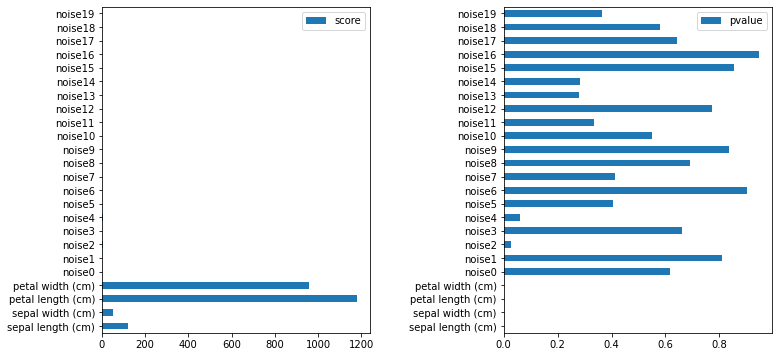

In [48]:
# lets plot p-values
plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
scores.plot(kind='barh', ax=ax1)
ax2 = plt.subplot(1,2,2)
pvalues.plot(kind='barh', ax=ax2);
plt.subplots_adjust(wspace=0.5)

## Compare with SVMs

In [54]:
# without univariate feature selection
pipe = make_pipeline(MinMaxScaler(), LinearSVC())
pipe.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('linearsvc', LinearSVC())])

In [56]:
score_without_feature_selection = pipe.score(X_test, y_test)
print('SVM score without univariate feature selection',pipe.score(X_test, y_test))

SVM score without univariate feature selection 0.7105263157894737


In [57]:
# with feature selection 
pipe_with_feature_selection = make_pipeline(SelectKBest(f_classif, k=4) ,MinMaxScaler(), LinearSVC())
pipe_with_feature_selection.fit(X_train, y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k=4)),
                ('minmaxscaler', MinMaxScaler()), ('linearsvc', LinearSVC())])

In [58]:
score_with_feature_selection = pipe_with_feature_selection .score(X_test, y_test)
print('SVM score without univariate feature selection',pipe_with_feature_selection .score(X_test, y_test))

SVM score without univariate feature selection 0.8421052631578947


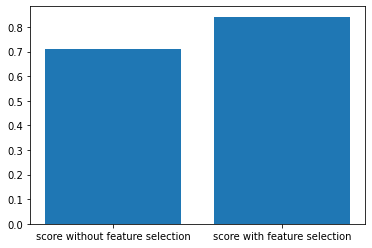

In [63]:
# comparison
plt.bar([1,2], [score_without_feature_selection, score_with_feature_selection], tick_label=['score without feature selection', 'score with feature selection']);